<h1>Kelompok DS2-S: Nada Aqila Mahmud, Nanda Eka Nurhidayah

<h2>Prediction of Customern Churn

<h3>Dataset Problem

This dataset contains information about Internet Provider Service companies that provide telecommunication services in the United States. However, due to the large number of similar companies, it creates a competition which causes the company to experience "Customer Churn". So a model using Machine Learning was created to help predict the Customer Churn.

<h3>Machine Learning Models

KNN and Decision Tree

<h3>Dataset Description

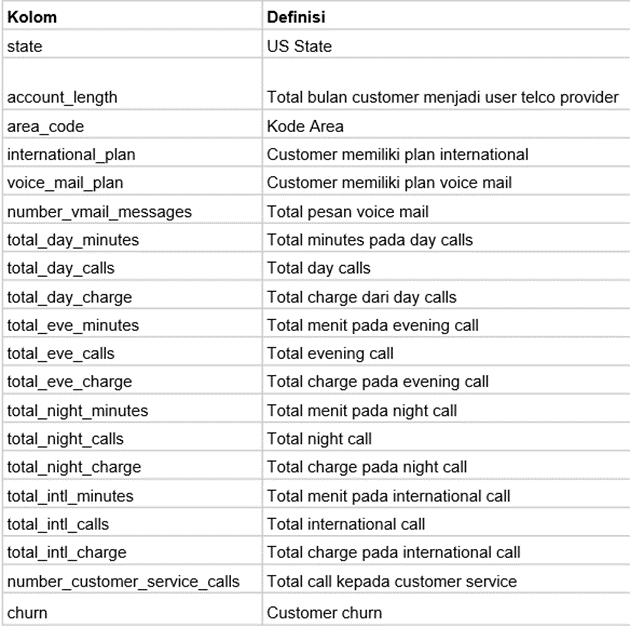

<h3>Importing Libraries

In [2]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Getting the Data

In [3]:
# --- Loading Dataset ---
train = pd.read_csv('Data Train.csv')
test = pd.read_csv('Data Test.csv')

<h3>Reading Dataset

In [4]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [6]:
train.shape

(4250, 20)

In [7]:
#Detecting Column Categorical and Numerical
target = 'churn'
labels = ['Not-Churn','Churn']
features = [i for i in train.columns.values if i not in [target]]

nu = train[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(train[features].shape[1]):
    if nu.values[i]<=15:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('The Dataset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))

The Dataset has 15 numerical & 4 categorical features.


<h3>Exploratory Data Analysis

Description of Train Dataset

In [12]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Proportion of Customer Churn

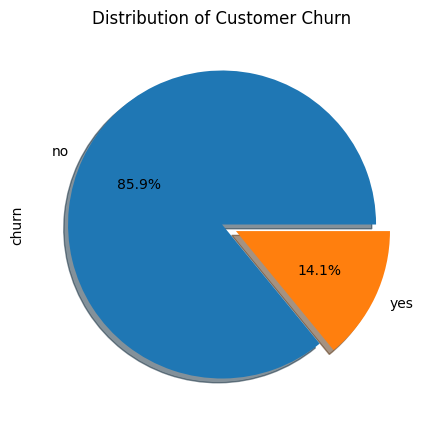

In [13]:
#set figure size and title
plt.subplots(figsize=(5,5))
plt.title('Distribution of Customer Churn', size = 12)
train['churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

#display the distribution of Customer Churn
plt.show()

Relatiom between the features

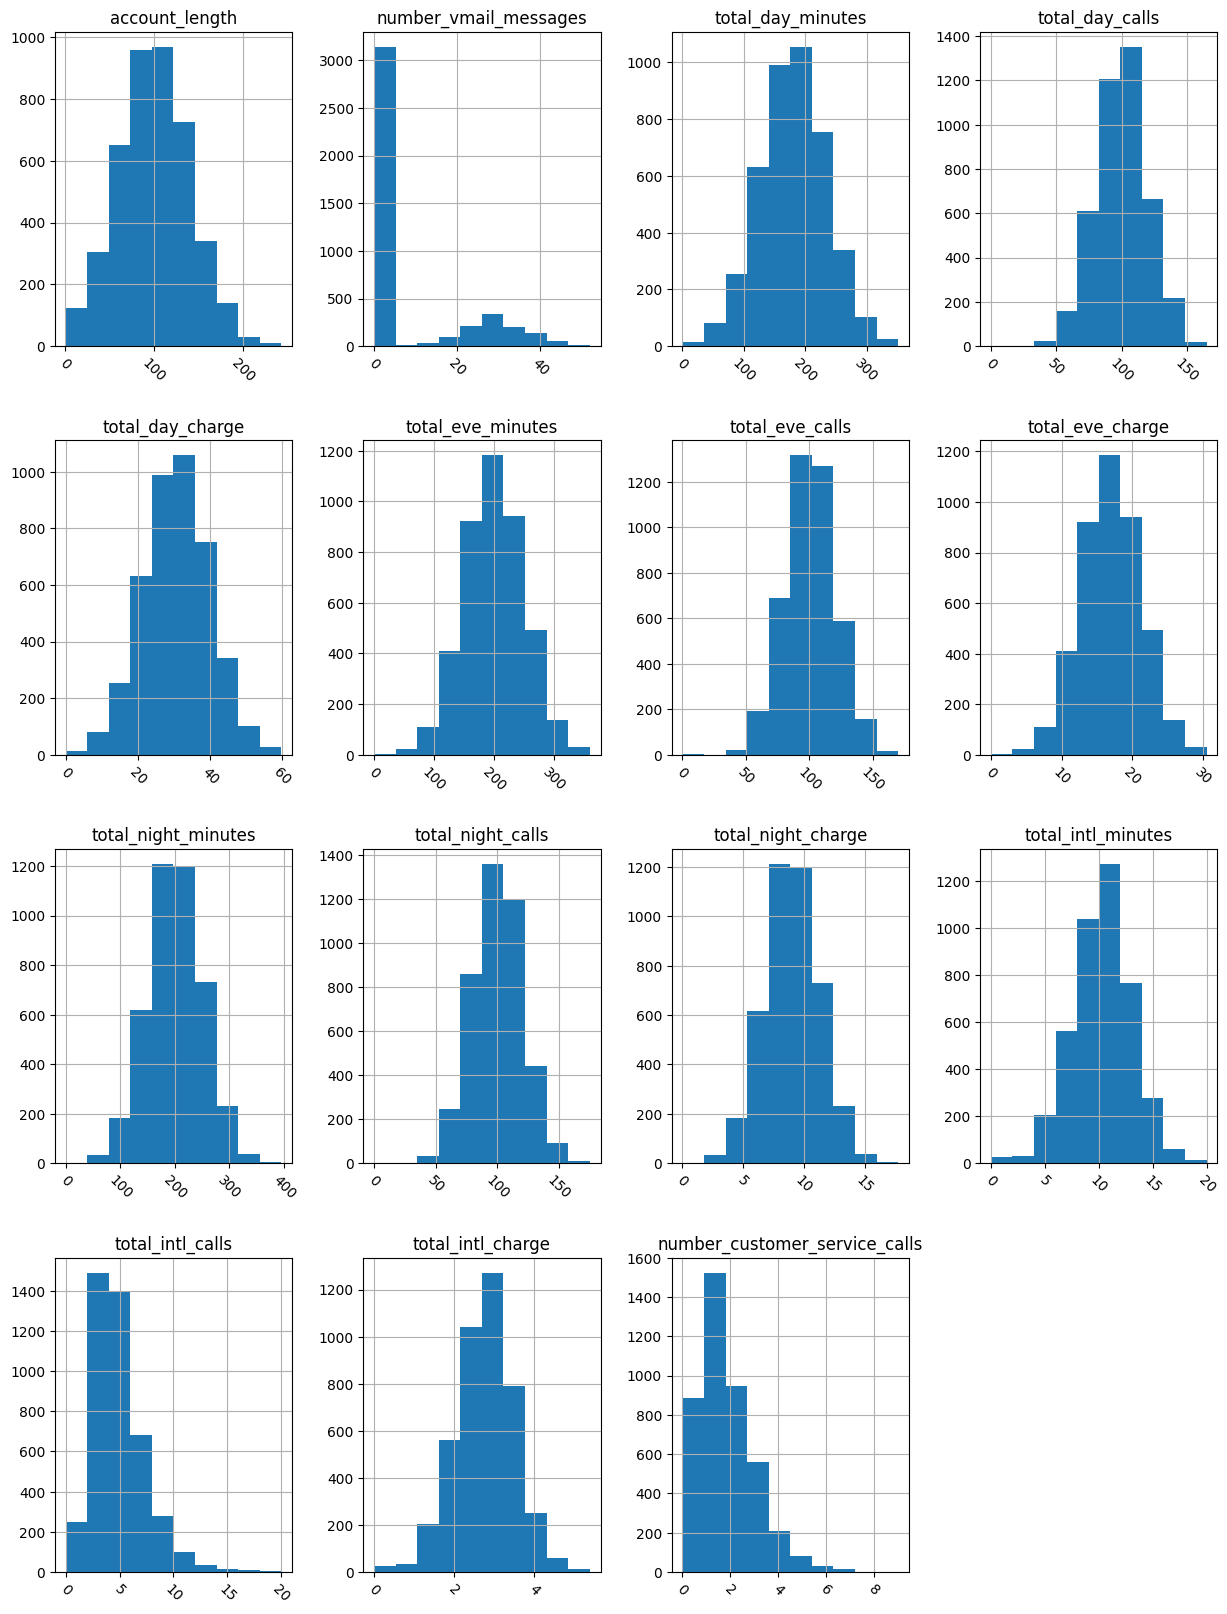

In [14]:
# visualization of the features 
train.hist(figsize=(15,20), xrot=-45)
plt.show()

Visualize the count of Churn based on Area Code

<Axes: xlabel='area_code', ylabel='count'>

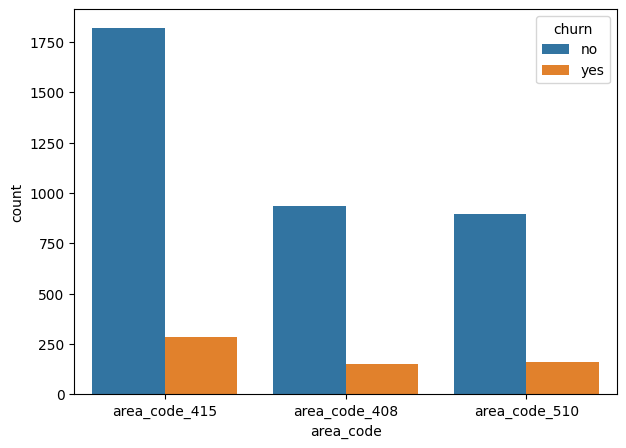

In [15]:
#Total Churn based on Area Code
fig = plt.subplots(figsize=(7, 5))
sns.countplot(x='area_code', hue = 'churn',data = train)

Visualize Churn based on International Plan

Text(0.5, 1.0, 'International Plan')

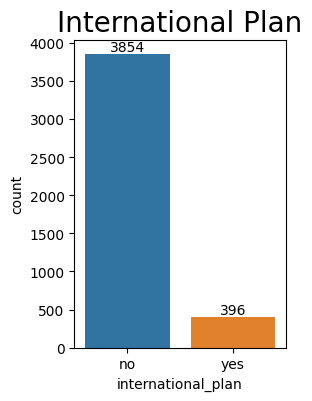

In [16]:
#Total Churn based on International Plan
plt.figure(figsize=(6,4))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='international_plan', data=train)
ax.bar_label(ax.containers[0])
plt.title("International Plan", fontsize=20)

Visualize Churn Based on Voice Mail Plan

Text(0.5, 1.0, 'Voice Mail Plan')

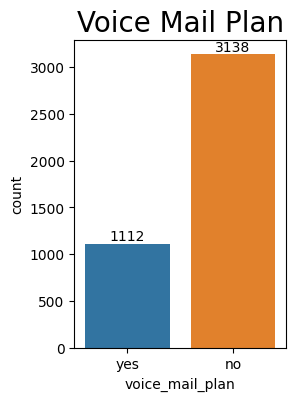

In [17]:
#Total Churn Based on Voice Mail Plan
plt.figure(figsize=(6,4))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='voice_mail_plan', data=train)
ax.bar_label(ax.containers[0])
plt.title("Voice Mail Plan", fontsize=20)

Distribution Account Length of Customer Churn

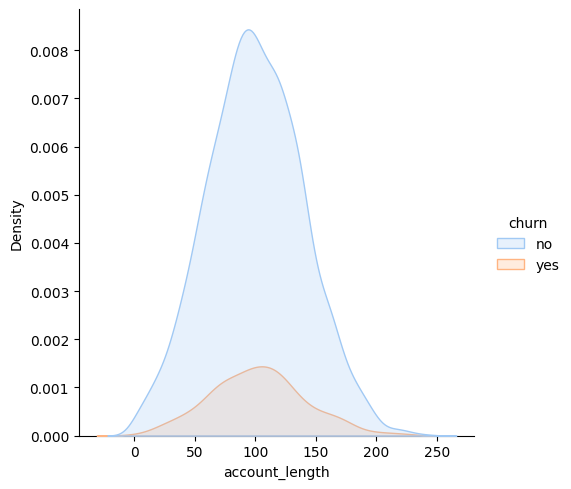

In [18]:
sns.displot(train, x='account_length', hue='churn', 
            kind='kde', fill=True, label='Account Length Distribution By Churn', legend=True, palette='pastel', zorder=3)

Correlation Between Features

C:\Users\User\AppData\Local\Temp\ipykernel_16884\392404218.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap=sns.heatmap(train.corr(), cmap=cmap, annot=True)


Text(0.5, 1.0, 'Churn Correlation Heatmap')

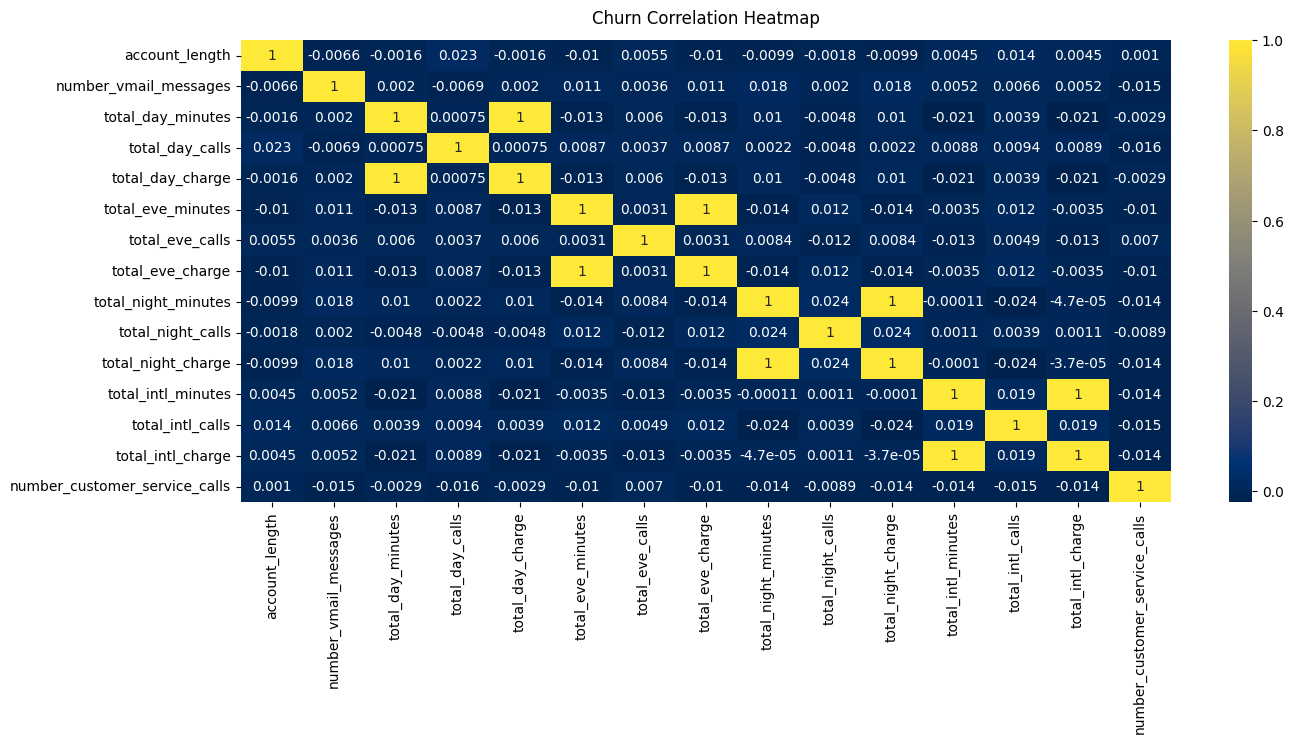

In [19]:
#Checking the correlation of all the attributes with target
plt.figure(figsize=(15,6))
cmap= "cividis"
heatmap=sns.heatmap(train.corr(), cmap=cmap, annot=True)
heatmap.set_title('Churn Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

<h3>Data Preprocessing

In [20]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


Checking the Missing Value

In [21]:
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Checking Unique Values

In [22]:
#Checking number of unique rows in each feature
train.nunique().sort_values()

churn                               2
international_plan                  2
voice_mail_plan                     2
area_code                           3
number_customer_service_calls      10
total_intl_calls                   21
number_vmail_messages              46
state                              51
total_day_calls                   120
total_eve_calls                   123
total_night_calls                 128
total_intl_minutes                168
total_intl_charge                 168
account_length                    215
total_night_charge                992
total_eve_charge                 1572
total_night_minutes              1757
total_eve_minutes                1773
total_day_charge                 1843
total_day_minutes                1843
dtype: int64

In [23]:
#Checking for Duplicate Values
train.duplicated().sum()

0

Cleaning the Data

In [24]:
#Drop Column State
train.drop("state", axis=1, inplace=True)

In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
# Converting the categorical variable into the numerical variable by using category_encoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['area_code','international_plan','voice_mail_plan','churn'])
train_encoded = encoder.fit_transform(train)
train_encoded.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,1,1,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1
1,137,1,1,2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1
2,84,2,2,2,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1
3,75,1,2,2,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1
4,121,3,1,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,1


<h3>Split Data for Training and Testing

In [27]:
#preparing data for split and prediction
X = train_encoded.drop(['churn'], axis = 1)
y = train['churn']

In [28]:
from sklearn.model_selection import train_test_split 

#split tha data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state= 21)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2975 samples.
Testing set has 1275 samples.


In [29]:
X_train.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
344,117,2,1,2,0,239.9,84,40.78,174.8,106,14.86,209.5,93,9.43,9.8,2,2.65,0
3343,42,3,2,2,0,260.9,94,44.35,152.8,123,12.99,212.6,94,9.57,11.1,4,3.00,1
3565,58,1,1,1,29,239.6,84,40.73,182.1,80,15.48,118.3,100,5.32,11.0,3,2.97,2
1518,125,1,2,2,0,187.3,118,31.84,160.7,111,13.66,263.8,112,11.87,9.6,2,2.59,0
2635,129,3,1,1,32,211.0,99,35.87,155.1,89,13.18,234.8,96,10.57,11.4,5,3.08,1


<h3>Building Model Machine Learning

1. K-Nearest Neighbor : k(4)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_knn)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_knn))
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))

Training set score: 0.90
Test set score: 0.90
Accuracy Score: 0.90
Confusion Matrix: 
 [[1097    9]
 [ 120   49]]
Classification_Report: 
               precision    recall  f1-score   support

          no       0.90      0.99      0.94      1106
         yes       0.84      0.29      0.43       169

    accuracy                           0.90      1275
   macro avg       0.87      0.64      0.69      1275
weighted avg       0.89      0.90      0.88      1275



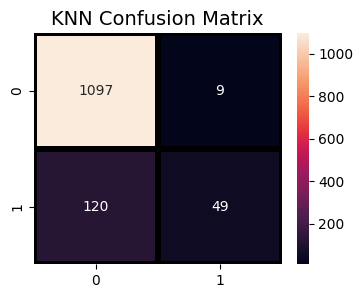

In [31]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_knn),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN Confusion Matrix",fontsize=14)
plt.show()

2. Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

print("Training set score: {:.2f}".format(decc.score(X_train, y_train)))
print("Test set score: {:.2f}".format(decc.score(X_test, y_test)))
print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred_decc)))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_decc))
print("Classification_Report: \n",classification_report(y_test,y_pred_decc))


Training set score: 1.00
Test set score: 0.91
Accuracy Score: 0.91
Confusion Matrix: 
 [[1027   79]
 [  36  133]]
Classification_Report: 
               precision    recall  f1-score   support

          no       0.97      0.93      0.95      1106
         yes       0.63      0.79      0.70       169

    accuracy                           0.91      1275
   macro avg       0.80      0.86      0.82      1275
weighted avg       0.92      0.91      0.91      1275



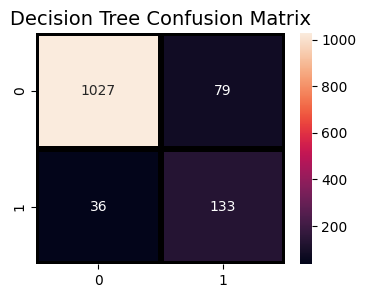

In [33]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_decc),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Decision Tree Confusion Matrix",fontsize=14)
plt.show()

<h3>Recommendation

- Maximazing telecomunications services in each area code evenly by knowing the "behaviour" of the user.
- Adding new features that make it easier for users such as international users by adding suggestions for packages to make them cheaper.